In [ ]:
# import cv2
# import numpy as np

# # Load an image from Colab's file system
# image = cv2.imread('/content/Mars_terrain.jpg')
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Edge detection
# edges = cv2.Canny(gray, 50, 150)

# # Hough Line Transform
# lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# # Visualize results
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# from google.colab.patches import cv2_imshow
# cv2_imshow(image)


Buffered data was truncated after reaching the output size limit.

In [2]:
# import cv2
# import numpy as np

# # Load the image
# image_path = "/content/pic2.png"  # Update this with your image path
# image = cv2.imread(image_path)

# # Resize the image (optional for better processing speed)
# image = cv2.resize(image, (640, 480))

# # Convert the image to HSV color space
# hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # Define the range for detecting yellow color
# lower_yellow = np.array([20, 100, 100])  # Adjust based on your specific image
# upper_yellow = np.array([30, 255, 255])

# # Create a mask for yellow color
# yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# # Apply edge detection
# edges = cv2.Canny(yellow_mask, 50, 150)

# # Detect lines using Hough Line Transform
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# # Draw detected lines on the image
# output_image = image.copy()
# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw green lines

# # Display the results
# cv2.imshow("Original Image", image)
# cv2.imshow("Yellow Mask", yellow_mask)
# cv2.imshow("Edges", edges)
# cv2.imshow("Detected Boundary Lines", output_image)

# # Wait for a key press and close windows
# cv2.waitKey(0)
# cv2.destroyAllWindows()


DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


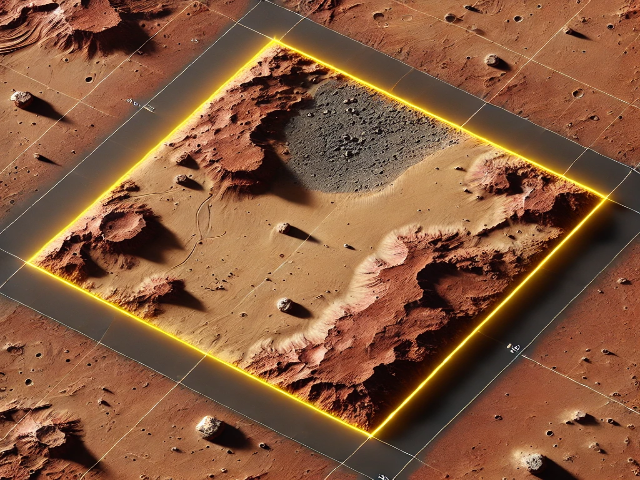

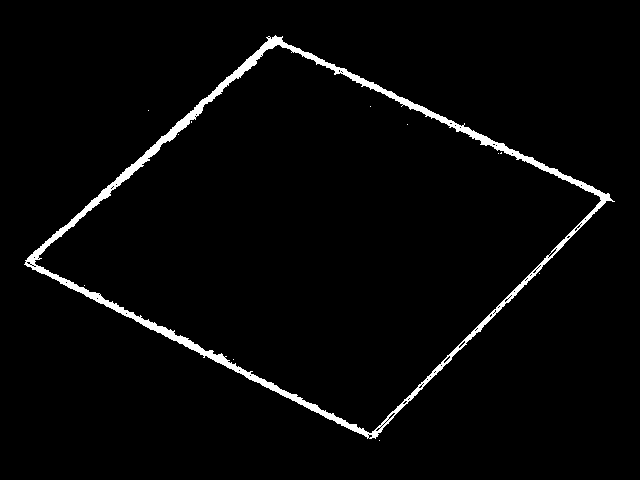

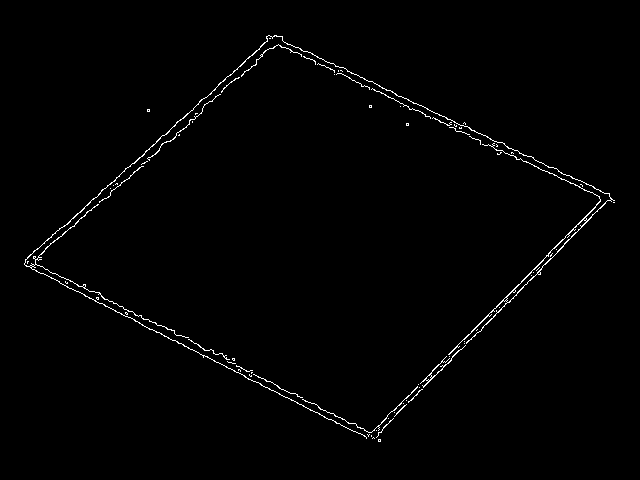

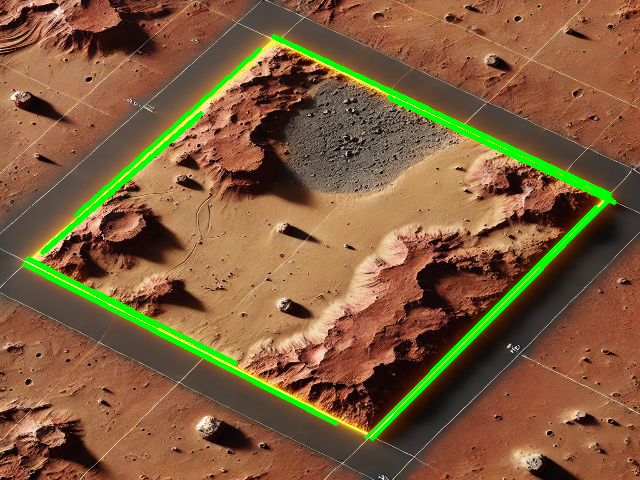

In [5]:
# Install packages
!pip install opencv-python numpy

# Import necessary libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow

# Load the image
image_path = "/content/pic2.png"  # Update this with your image path
image = cv2.imread(image_path)

# Resize the image (optional for better processing speed)
image = cv2.resize(image, (640, 480))

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the range for detecting yellow color
lower_yellow = np.array([20, 100, 100])  # Adjust based on your specific image
upper_yellow = np.array([30, 255, 255])

# Create a mask for yellow color
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Apply edge detection
edges = cv2.Canny(yellow_mask, 50, 150)

# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw detected lines on the image
output_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw green lines

# Display the results using cv2_imshow instead of cv2.imshow
cv2_imshow(image) # Display image with cv2_imshow
cv2_imshow(yellow_mask) # Display yellow mask with cv2_imshow
cv2_imshow(edges) # Display edges with cv2_imshow
cv2_imshow(output_image) # Display output_image with cv2_imshow

# There is no need for these functions in Colab
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
import cv2
import numpy as np

# Path to the input video
input_video_path = "/content/WhatsApp Video 2024-12-22 at 14.08.54_d074c937.mp4"  # Update this with your video path
output_video_path = "/content/output_video.mp4"  # Path for saving the output video

# Open the input video
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Define HSV range for yellow detection
lower_yellow = np.array([20, 100, 100])  # Adjust based on your specific yellow shade
upper_yellow = np.array([30, 255, 255])

while True:
    ret, frame = cap.read()
    if not ret:
        print("End of video stream.")
        break

    # Resize frame (optional for large videos)
    # frame = cv2.resize(frame, (1280, 720))

    # Convert to HSV color space
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Create a mask for yellow color
    yellow_mask = cv2.inRange(hsv_frame, lower_yellow, upper_yellow)

    # Clean up the mask using morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, kernel)
    yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel)

    # Edge detection
    edges = cv2.Canny(yellow_mask, 50, 150)

    # Detect lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=20)

    # Draw detected lines on the original frame
    output_frame = frame.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_frame, (x1, y1), (x2, y2), (0, 255, 0), 3)  # Draw green lines

    # Write the processed frame to the output video
    out.write(output_frame)

    # Optionally display the frame (comment out if not needed)
    # cv2.imshow("Processed Frame", output_frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Output video saved at {output_video_path}")


End of video stream.
Output video saved at /content/output_video.mp4


In [5]:
# import cv2
# import numpy as np

# # Path to the input video and output video
# input_video_path = "/content/WhatsApp Video 2024-12-22 at 14.08.54_d074c937.mp4"
# output_video_path = "/content/output_video2.mp4"

# # Open the video stream
# cap = cv2.VideoCapture(input_video_path)
# if not cap.isOpened():
#     print("Error: Could not open video.")
#     exit()

# # Get video frame dimensions and fps
# frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# # Define video writer to save output
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
# out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# # Define yellow color range in HSV space
# lower_yellow = np.array([20, 100, 100])
# upper_yellow = np.array([30, 255, 255])

# while True:
#     ret, frame = cap.read()
#     if not ret:
#         print("End of video stream.")
#         break

#     # Convert the frame to HSV
#     hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#     # Create a mask for yellow regions
#     yellow_mask = cv2.inRange(hsv_frame, lower_yellow, upper_yellow)

#     # Apply morphological operations to clean the mask (remove noise)
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
#     yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_CLOSE, kernel)
#     yellow_mask = cv2.morphologyEx(yellow_mask, cv2.MORPH_OPEN, kernel)

#     # Find contours in the yellow mask
#     contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Draw the contours on the original frame
#     output_frame = frame.copy()
#     for contour in contours:
#         if cv2.contourArea(contour) > 500:  # Filter small contours
#             # Approximate the contour to reduce points
#             epsilon = 0.02 * cv2.arcLength(contour, True)
#             approx = cv2.approxPolyDP(contour, epsilon, True)

#             # Draw the approximated contour
#             cv2.drawContours(output_frame, [approx], -1, (0, 255, 0), 3)

#             # Optionally, draw the convex hull for a more unified boundary
#             hull = cv2.convexHull(contour)
#             cv2.drawContours(output_frame, [hull], -1, (0, 0, 255), 2)

#     # Write the processed frame to the output video
#     out.write(output_frame)

# # Release resources
# cap.release()
# out.release()

# print(f"Processed video saved at {output_video_path}")


End of video stream.
Processed video saved at /content/output_video2.mp4
